In [1]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import re

In [2]:
data = pd.read_csv(r'/home/khinevich/myproject/projects/parsers/leetcode/parser-leetcode/data/sols/two-sum.csv')
post_content = list(data.post_content)
train_post_content = post_content[:80]
test_post_content = post_content[82:]

# Обработка данных

In [3]:
data.solutionTags = data.solutionTags.map(eval)
tags = set([t for tags in data.solutionTags for t in tags])

In [4]:
def clean_code(str_code: str, code_pattern: str = None):
    str_code = re.sub(pattern=f'{code_pattern}', repl='', string=str_code) if code_pattern else str_code
    str_code = re.sub(pattern=r'\\n', string=str_code, repl=' ')
    str_code = re.sub(pattern=r'\s+', string=str_code, repl=' ')
    return str_code

for i in range(data.shape[0]):
    post_content = data.iloc[i, data.columns.get_loc('post_content')]
    for t in tags:
        codes = None
        code_feature_name = f'code_{t}'
        if code_feature_name not in data.columns:
            data[code_feature_name] = None
        if t in data.iloc[i, data.columns.get_loc('solutionTags')]:
            code_pattern = re.escape(t)
            code_pattern = 'Python' if code_pattern == r'Python3' else code_pattern
            codes = re.findall(
                pattern=r'```{code_pattern}.*?\\n\\n```'.format(code_pattern=code_pattern),
                string=post_content
            )
            if codes:
                codes = ' '.join(codes)
                codes = clean_code(codes, code_pattern=code_pattern)
            else:
                codes = re.findall(pattern=r'\# Code.*', string=post_content)
                codes = ' '.join(codes)
                codes = clean_code(codes)
            data.iloc[i, data.columns.get_loc(code_feature_name)] = codes
            codes = None

In [5]:
data.iloc[0].post_content

'# Intuition\\n<!-- Describe your first thoughts on how to solve this problem. -->\\nThe Two Sum problem asks us to find two numbers in an array that sum up to a given target value. We need to return the indices of these two numbers.\\n# Approach\\n<!-- Describe your approach to solving the problem. -->\\n1. One brute force approach is to consider every pair of elements and check if their sum equals the target. This can be done using nested loops, where the outer loop iterates from the first element to the second-to-last element, and the inner loop iterates from the next element to the last element. However, this approach has a time complexity of O(n^2).\\n2. A more efficient approach is to use a hash table (unordered_map in C++). We can iterate through the array once, and for each element, check if the target minus the current element exists in the hash table. If it does, we have found a valid pair of numbers. If not, we add the current element to the hash table.\\n\\n**Approach using

In [6]:
data.iloc[0, data.columns.get_loc('code_C++')]

'``` [] class Solution { public: vector<int> twoSum(vector<int>& nums, int target) { int n = nums.size(); for (int i = 0; i < n - 1; i++) { for (int j = i + 1; j < n; j++) { if (nums[i] + nums[j] == target) { return {i, j}; } } } return {}; // No solution found } }; ``` ``` [] class Solution { public: vector<int> twoSum(vector<int>& nums, int target) { unordered_map<int, int> numMap; int n = nums.size(); // Build the hash table for (int i = 0; i < n; i++) { numMap[nums[i]] = i; } // Find the complement for (int i = 0; i < n; i++) { int complement = target - nums[i]; if (numMap.count(complement) && numMap[complement] != i) { return {i, numMap[complement]}; } } return {}; // No solution found } }; ``` ``` [] class Solution { public: vector<int> twoSum(vector<int>& nums, int target) { unordered_map<int, int> numMap; int n = nums.size(); for (int i = 0; i < n; i++) { int complement = target - nums[i]; if (numMap.count(complement)) { return {numMap[complement], i}; } numMap[nums[i]] = i; } 

In [7]:
data

,Unnamed: 0,id_sol,title_sol,commentCount,topLevelCommentCount,viewCount,solutionTags,post_id,post_content,code_Java,code_Hash Table,code_C++,code_Array,code_Python3
0,0,3619262,✅3 Method's || C++ || JAVA || PYTHON || Beginn...,6,5,10688,"[C++, Java, Python3, Array, Hash Table]",5545248,# Intuition\n<!-- Describe your first thoughts...,``` [] class Solution { public int[] twoSum(in...,# Code # Solution 1: (Brute Force) ```C++ [] c...,``` [] class Solution { public: vector<int> tw...,# Code # Solution 1: (Brute Force) ```C++ [] c...,"```3 [] class Solution: def twoSum(self, nums:..."
1,1,3543160,Python🔥Java🔥 C++🔥|| Simple Solution,11,8,70162,"[C++, Java, Python3, Array, Hash Table]",5445878,# Please UPVOTE \uD83D\uDC4D\n\n# **!! BIG ANN...,``` [] class Solution { public int[] twoSum(in...,,``` [] class Solution { public: vector<int> tw...,,"``` [] class Solution: def twoSum(self, nums: ..."
2,2,2990807,Solution - C++/Java/Python (Both Brute force...,107,64,293922,"[C++, Java, Python3, Array, Hash Table]",4733461,# Beginner doubt - Where is main function?\n- ...,``` [] class Solution { public int[] twoSum(in...,,``` [] class Solution { public: vector<int> tw...,,"``` [] class Solution: def twoSum(self, nums: ..."
3,3,3631188,(VIDEO) Visualization of O(n) Solution Using a...,0,0,153,"[C++, Java, Python3, Array, Hash Table]",5561824,https://www.youtube.com/watch?v=luicuNOBTAI\n\...,# Code ``` class Solution(object): def twoSum(...,# Code ``` class Solution(object): def twoSum(...,# Code ``` class Solution(object): def twoSum(...,# Code ``` class Solution(object): def twoSum(...,# Code ``` class Solution(object): def twoSum(...
4,4,3556832,Two sums || 3 easy methods in Python,4,2,24309,"[C++, Java, Python3, Array, Hash Table]",5463583,# Intuition\nMethod 1: A brute-force solution ...,# Code Method 1: ``` class Solution: def twoSu...,# Code Method 1: ``` class Solution: def twoSu...,# Code Method 1: ``` class Solution: def twoSu...,# Code Method 1: ``` class Solution: def twoSu...,# Code Method 1: ``` class Solution: def twoSu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2744523,Easy python,0,0,501,"[C++, Java, Python3, Array, Hash Table]",4406867,"```\nclass Solution:\n def twoSum(self, num...",,,,,
96,96,2825280,Plate form independent code run anywhere 😉,1,1,109,"[C++, Java, Python3, Array, Hash Table]",4516318,import java.util.Scanner;\n class Solution ...,,,,,
97,97,13,Accepted C++ O(n) Solution,243,128,315249,"[C++, Java, Python3, Array, Hash Table]",13,"vector<int> twoSum(vector<int> &numbers, i...",,,,,
98,98,2750671,Python fast,0,0,534,"[C++, Java, Python3, Array, Hash Table]",4415463,"```\nclass Solution:\n def twoSum(self, num...",,,,,


In [13]:
a = re.findall(
    pattern=r'```Python.*?\\n\\n```',
    string=train_post_content[1]
)

In [14]:
a

['```Python []\\nclass Solution:\\n    def twoSum(self, nums: List[int], target: int) -> List[int]:\\n        \\n        d = {}\\n        for i, j in enumerate(nums):\\n            r = target - j\\n            if r in d: return [d[r], i]\\n            d[j] = i\\n\\t\\t\\n\\t\\t# An Upvote will be encouraging\\n```\\n```Java []\\nclass Solution {\\n    public int[] twoSum(int[] nums, int target) {\\n        Map<Integer, Integer> map = new HashMap<>();\\n        for (int i = 0; i < nums.length; i++) {\\n            int complement = target - nums[i];\\n            if (map.containsKey(complement)) {\\n                return new int[] { map.get(complement), i };\\n            }\\n            map.put(nums[i], i);\\n        }\\n        return new int[] {-1, -1};\\n    }\\n}\\n\\n```']

In [185]:
data.columns

Index(['Unnamed: 0', 'id_sol', 'title_sol', 'commentCount',
       'topLevelCommentCount', 'viewCount', 'solutionTags', 'post_id',
       'post_content', 'code_Java', 'code_Python3', 'code_Hash Table',
       'code_C++', 'code_Array'],
      dtype='object')

<Axes: xlabel='post_content', ylabel='viewCount'>

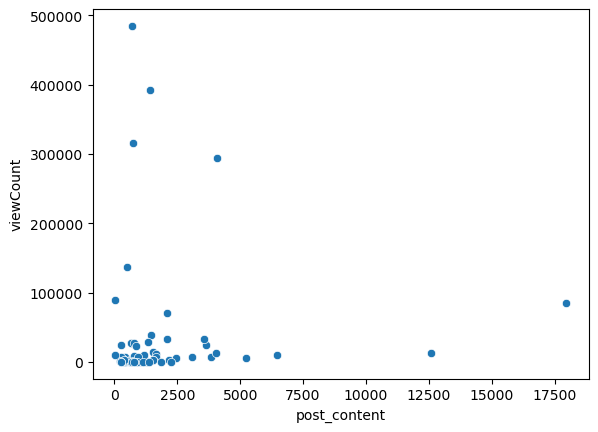

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=data.post_content.map(len), y=data.viewCount)

In [85]:
train_post_content[1]

"# Please UPVOTE \\uD83D\\uDC4D\\n\\n# **!! BIG ANNOUNCEMENT !!**\\nI am currently Giving away my premium content well-structured assignments and study materials to clear interviews at top companies related to computer science and data science to my current Subscribers this week. This is Only for first 10,000 subscribers. **DON\\'T FORGET** to Subscribe\\n\\n**Click this link to Subscribe \\uD83D\\uDC49https://www.youtube.com/@techwired8/?sub_confirmation=1**\\n\\nLet\\'s connect!\\n\\nDiscord \\uD83D\\uDC49 https://discord.gg/gJDCyeGh6X\\nTwitter \\uD83D\\uDC49 https://twitter.com/TechWired8\\n\\nHappy Learning, Cheers Guys \\uD83D\\uDE0A\\n\\nhttps://youtu.be/oadssnyJA90\\n\\n# Recursion Explained (How to think recursively)\\n\\nhttps://youtu.be/KjpmuPDQWcU\\n\\n```Python []\\nclass Solution:\\n    def twoSum(self, nums: List[int], target: int) -> List[int]:\\n        \\n        d = {}\\n        for i, j in enumerate(nums):\\n            r = target - j\\n            if r in d: return

In [15]:
def func_(x):
    f = re.findall(pattern=r'\# Code.*', string=x)
    if f:
        return f[0]
    return None
data['code'] = data.post_content.map(lambda x: func_(x))

In [16]:
data.code

0     # Code\n# Solution 1: (Brute Force)\n```C++ []...
1                                                  None
2                                                  None
3     # Code\n```\nclass Solution(object):\n    def ...
4     # Code\n\nMethod 1: \n```\nclass Solution:\n  ...
                            ...                        
95                                                 None
96                                                 None
97                                                 None
98                                                 None
99    # Code\n```\nclass Solution {\npublic: \nvecto...
Name: code, Length: 100, dtype: object

In [48]:
code_pattern = re.escape("C++")
print(code_pattern)

C\+\+


In [5]:
tagged_documents = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(train_post_content)]

In [6]:
model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4)


In [7]:
model.build_vocab(tagged_documents)


In [8]:
model.train(tagged_documents, total_examples=model.corpus_count, epochs=10)


In [9]:
vector1 = model.infer_vector(test_post_content[0].split())
vector1

array([-0.11421704, -0.16869329, -0.1311085 ,  0.15842183,  0.18068574,
       -0.19690864,  0.1021701 ,  0.06621964, -0.21260694,  0.04671054,
       -0.08010245, -0.18820822, -0.06973926, -0.09175146, -0.01389901,
       -0.0824846 ,  0.11496942,  0.08236564,  0.01394969, -0.3581964 ,
        0.05241404,  0.02847877,  0.05041759,  0.12069198, -0.13403825,
       -0.02659732, -0.3440858 , -0.08170893, -0.23534492, -0.10075954,
        0.1919182 ,  0.1322539 ,  0.04781409, -0.13219114, -0.23202437,
        0.22904919, -0.06868764, -0.28719455, -0.00110642, -0.0405323 ,
        0.32086462, -0.07599926,  0.18296228, -0.16250142,  0.06526873,
       -0.18563323, -0.1129214 , -0.19862333,  0.14850083, -0.14120717,
        0.09275218, -0.25915498,  0.06408664, -0.2766487 , -0.17290099,
        0.26926693, -0.1038768 ,  0.18881367, -0.05006739,  0.05138966,
        0.2687577 ,  0.14255452,  0.06991699, -0.01668646, -0.08940148,
        0.23047729,  0.14064282,  0.09148346, -0.12077975,  0.23

In [10]:
vector2 = model.infer_vector(test_post_content[1].split())
vector2

array([-0.21409146, -0.0509858 , -0.34905195, -0.04936141,  0.196039  ,
       -0.475825  , -0.08481397,  0.11673631, -0.27869532, -0.01147345,
       -0.0827759 , -0.28975585, -0.13983968,  0.11030883,  0.02813417,
       -0.03313323, -0.07666406, -0.2530936 , -0.10642164, -0.6034243 ,
       -0.07883269,  0.16284156, -0.08857939, -0.04661525,  0.1319328 ,
       -0.03665722, -0.3311591 , -0.23390451, -0.43417728, -0.3811227 ,
        0.3806645 ,  0.4422239 ,  0.12889618, -0.10807559, -0.13987887,
        0.4645881 , -0.11416044, -0.56327367, -0.0966622 , -0.50399953,
        0.16300802, -0.02103984, -0.18911156, -0.40957296,  0.22976911,
       -0.12720843, -0.29287967,  0.13122396,  0.26576966, -0.02582296,
       -0.05488893, -0.3473022 , -0.22670072, -0.20146726, -0.0020639 ,
        0.41452807, -0.05908921,  0.13091555, -0.44378757,  0.1969516 ,
        0.4970227 ,  0.28294095,  0.15259339,  0.0470716 , -0.02767155,
        0.14855595,  0.2500686 ,  0.09999102, -0.2904565 ,  0.29

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
similarity = cosine_similarity([vector1], [vector2])[0][0]
similarity

0.66958266

In [13]:
from scipy.spatial.distance import euclidean
distance = euclidean(vector1, vector2)
similarity = 1 / (1 + distance)  # Можно также выразить схожесть через близость
distance, similarity

(1.886379599571228, 0.34645477682441705)

In [14]:
test_doc = """
Sure! Here's a solution to the problem using a dictionary to optimize the time complexity to O(n):

python
Copy code
def twoSum(nums, target):
    # Create a dictionary to store the complement of each number
    complement_dict = {}

    # Iterate through the array
    for i, num in enumerate(nums):
        # Check if the complement of the current number exists in the dictionary
        if num in complement_dict:
            # If it does, return the indices
            return [complement_dict[num], i]
        else:
            # If it doesn't, add the current number and its index to the dictionary
            complement = target - num
            complement_dict[complement] = i

    # If no solution is found, return an empty list
    return []

# Example usage:
nums = [2, 7, 11, 15]
target = 9
result = twoSum(nums, target)
print(result)
The above code will output [0, 1] as the result, which corresponds to the indices of the two numbers in the array that add up to the target.

The solution works by iterating through the array of numbers and for each number, checking if its complement (the difference between the target and the current number) exists in the dictionary. If the complement is found, it means we have found the two numbers that add up to the target, so we return their indices. If the complement is not found, we add the current number and its index to the dictionary for future lookups. If no solution is found after iterating through the entire array, an empty list is returned.
"""

In [15]:
test_doc_other = """
Intuition
Approach
Complexity

    Time complexity:O(max(l1,l2)).

    Space complexity:O(n).

Code

/**
 * Definition for singly-linked list.
 * struct ListNode {
 *     int val;
 *     ListNode *next;
 *     ListNode() : val(0), next(nullptr) {}
 *     ListNode(int x) : val(x), next(nullptr) {}
 *     ListNode(int x, ListNode *next) : val(x), next(next) {}
 * };
 */
class Solution {
public:
    ListNode* addTwoNumbers(ListNode* l1, ListNode* l2) {
        ListNode* dummy=new ListNode();
        ListNode* temp=dummy;
        int carry=0;
        while(l1!=NULL || l2!=NULL || carry){
            int sum=0;
            if(l1!=NULL){
                sum+=l1->val;
                l1=l1->next;
            }
            if(l2!=NULL){
                sum+=l2->val;
                l2=l2->next;
            }
            sum+=carry;
            carry=sum/10;
            ListNode* newnode=new ListNode(sum%10);
            temp->next=newnode;
            temp=temp->next;
        }
        return dummy->next;
    }
};
if it helps plzz dont't forget to upvote it :)
"""

In [16]:
vec2 = model.infer_vector(test_doc.split())
for i, doc in enumerate(post_content):
    vec1 = model.infer_vector(doc[1].split())
    cs = cosine_similarity([vec1], [vec2])[0][0]
    if cs > 0.5:
        print(i, cs)

10 0.8937745
15 0.8534868
25 0.8407126
26 0.92114276
33 0.9114044
36 0.88035417
41 0.73565114
53 0.8515702
55 0.881529
56 0.9390649
57 0.7338358
60 0.88338226
68 0.9293549
69 0.8300905
72 0.9366051
76 0.9423258
77 0.9101177
80 0.9019828
81 0.88483375
85 0.9053195
96 0.8657909


In [17]:
print(post_content[72])

**using HASHMAP 3ms solution**\n```\nclass Solution {\n    public int[] twoSum(int[] nums, int target) {\n        HashMap<Integer,Integer> hash=new HashMap<Integer,Integer>();\n        for(int i=0;i<nums.length;i++){\n            Integer diff=(Integer)(target-nums[i]);\n            if(hash.containsKey(diff)){\n                int R[]={hash.get(diff),i};\n                return R;\n            }\n            hash.put(nums[i],i);\n        }\n        return null;\n            \n        \n    }\n}\n```\n**BRUTE FORCE APPROACH\n```\nclass Solution {\n    public int[] twoSum(int[] nums, int target) {\n        for(int i=0;i<nums.length;i++)\n        {\n            for(int j=i+1;j<nums.length;j++){\n                if(nums[i]+nums[j]==target)\n                {\n                    return new int[]{i,j};\n                }\n            }\n                   \n        }\n        return nums;\n        \n    }\n}\n\n```


In [18]:
vec3_other = model.infer_vector(test_doc_other.split())
for i, doc in enumerate(post_content):
    vec1 = model.infer_vector(doc[1].split())
    cs = cosine_similarity([vec1], [vec3_other])[0][0]
    if cs > 0.5:
        print(i, cs)

10 0.9270282
15 0.9334644
25 0.91926247
26 0.82321703
33 0.8193725
36 0.95220125
41 0.6376851
53 0.90563744
55 0.89302063
56 0.91774595
57 0.72997487
60 0.92335653
68 0.9244324
69 0.84330106
72 0.89371854
76 0.9113062
77 0.8300505
80 0.93570983
81 0.8904112
85 0.9327634
96 0.9463647


In [19]:
print(post_content[10])

class Solution {\npublic:\n    vector<int> twoSum(vector<int>& nums, int target) {\n        \n            vector<int>a;\n        \n        for(int i = 0; i<nums.size()-1; i++){\n            for(int j = i+1; j<nums.size(); j++){\n                if(nums[i] + nums[j] == target){\n                    a.push_back(i);\n                     a.push_back(j);\n                }  \n            }\n        }\n       return a; \n    }\n};


In [20]:
test_doc_other2 = """
Approach

    I am using Two pointers method
    After shifting the val to the right side of the array.
    Just return the value of k which is length of array excluding val.

Complexity

    Time complexity:O(n)

    Space complexity:O(1)

Code

class Solution {
    public int removeElement(int[] nums, int val) {
        int i = 0;
        for (int j = 0; j < nums.length; j++) {
            if (nums[j] != val) {
                int temp = nums[i];
                nums[i] = nums[j];
                nums[j] = temp;
                i++;
            }
        }
        return i;
    }
}
"""

In [21]:
vec4_other = model.infer_vector(test_doc_other2.split())
for i, doc in enumerate(post_content):
    vec1 = model.infer_vector(doc[1].split())
    cs = cosine_similarity([vec1], [vec4_other])[0][0]
    if cs > 0.5:
        print(i, cs)

10 0.9403642
15 0.94857836
25 0.7489716
26 0.9565167
33 0.92835754
36 0.9373391
41 0.7472069
53 0.9610308
55 0.88455546
56 0.9331061
57 0.8815865
60 0.901096
68 0.89642924
69 0.92372483
72 0.8819122
76 0.92275465
77 0.8934142
80 0.9639993
81 0.91467255
85 0.94582856
96 0.8878387


In [22]:
post_content[96]

'import java.util.Scanner;\\n    class Solution {\\n        public static int[] twoSum(int[] nums, int target) {\\n            int addOfIndex;\\n            // System.out.println("Number of elements in nums :"+nums.length);\\n            for (int i = 0; i < nums.length; i++) {\\n                for (int j = i + 1; j < nums.length; j++) {\\n                    int[] add = new int[2];\\n                    addOfIndex = nums[i] + nums[j];\\n                    if (addOfIndex == target) {\\n                        add[0] = i;\\n                        add[1] = j;\\n                        return add;\\n                    }\\n                }\\n            }\\n\\n            return null;\\n        }\\n        public static void main(String []args){\\n            Scanner sc=new Scanner(System.in);\\n            // Solution s1=new Solution;\\n            System.out.println("Enter number of element :");\\n            int n=sc.nextInt();\\n            System.out.println("Enter your elements :

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data

,Unnamed: 0,id_sol,title_sol,commentCount,topLevelCommentCount,viewCount,solutionTags,post_id,post_content
0,0,3619262,✅3 Method's || C++ || JAVA || PYTHON || Beginn...,6,5,10688,"['C++', 'Java', 'Python3', 'Array', 'Hash Table']",5545248,# Intuition\n<!-- Describe your first thoughts...
1,1,3543160,Python🔥Java🔥 C++🔥|| Simple Solution,11,8,70162,"['C++', 'Java', 'Python3', 'Array', 'Hash Table']",5445878,# Please UPVOTE \uD83D\uDC4D\n\n# **!! BIG ANN...
2,2,2990807,Solution - C++/Java/Python (Both Brute force...,107,64,293922,"['C++', 'Java', 'Python3', 'Array', 'Hash Table']",4733461,# Beginner doubt - Where is main function?\n- ...
3,3,3631188,(VIDEO) Visualization of O(n) Solution Using a...,0,0,153,"['C++', 'Java', 'Python3', 'Array', 'Hash Table']",5561824,https://www.youtube.com/watch?v=luicuNOBTAI\n\...
4,4,3556832,Two sums || 3 easy methods in Python,4,2,24309,"['C++', 'Java', 'Python3', 'Array', 'Hash Table']",5463583,# Intuition\nMethod 1: A brute-force solution ...
...,...,...,...,...,...,...,...,...,...
95,95,2744523,Easy python,0,0,501,"['C++', 'Java', 'Python3', 'Array', 'Hash Table']",4406867,"```\nclass Solution:\n def twoSum(self, num..."
96,96,2825280,Plate form independent code run anywhere 😉,1,1,109,"['C++', 'Java', 'Python3', 'Array', 'Hash Table']",4516318,import java.util.Scanner;\n class Solution ...
97,97,13,Accepted C++ O(n) Solution,243,128,315249,"['C++', 'Java', 'Python3', 'Array', 'Hash Table']",13,"vector<int> twoSum(vector<int> &numbers, i..."
98,98,2750671,Python fast,0,0,534,"['C++', 'Java', 'Python3', 'Array', 'Hash Table']",4415463,"```\nclass Solution:\n def twoSum(self, num..."


In [42]:
data['vec'] = data.post_content.map(lambda x: model.infer_vector(x.split(' ')))

In [1]:
pd.DataFrame(data['vec'])

NameError: name 'pd' is not defined